In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font="IPAexGothic",style="white")

評価用データ\
train_csv,train_add.csv,2014_csvこれをまず合体させてtrain_dataとする\
condition.csv,condition_add.csvは天気，気温使えそう（id一致でデータ合体）


In [124]:
train1 = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train2 = pd.read_csv("train_add.csv")
y2014_add = pd.read_csv("2014_add.csv")
condition = pd.read_csv("condition.csv")
condition_add = pd.read_csv("condition_add.csv")

print("Data Shapes")
print("Train:",train1.shape, "Test:",test.shape,"Train_add:",train2.shape,"2014_add:",y2014_add.shape,\
      "Condition:",condition.shape,"Condition_add:",condition_add.shape)

Data Shapes
Train: (1721, 11) Test: (313, 10) Train_add: (232, 11) 2014_add: (38, 10) Condition: (2034, 31) Condition_add: (270, 31)


In [126]:
train1.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [127]:
train2.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ水戸
1,14020,15072,2012,Ｊ１,第３節第２日,03/25(日),19:03,ガンバ大阪,ジュビロ磐田,万博記念競技場,スカパー／ｅ２／スカパー光
2,14023,25743,2012,Ｊ１,第４節第１日,03/31(土),15:03,浦和レッズ,川崎フロンターレ,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／テレ玉
3,14076,24183,2012,Ｊ１,第１０節第１日,05/06(日),13:03,横浜Ｆ・マリノス,コンサドーレ札幌,日産スタジアム,スカパー／ｅ２／スカパー光
4,14081,20512,2012,Ｊ１,第１０節第１日,05/06(日),17:03,名古屋グランパス,川崎フロンターレ,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／名古屋テレビ（録）


In [129]:
#train1とtrain2のデータフレームを合成
train = pd.concat([train1,train2],sort=False).reset_index(drop=True)
train.shape

(1953, 11)

In [130]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [131]:
train.describe()

,id,y,year
count,1953.000000,1953.000000,1953.000000
mean,15049.442396,10629.558116,2012.820276
std,646.260483,8102.315189,0.758124
min,13994.000000,0.000000,2012.000000
25%,14482.000000,4687.000000,2012.000000
50%,15044.000000,8594.000000,2013.000000
75%,15532.000000,13471.000000,2013.000000
max,16238.000000,62632.000000,2014.000000


In [132]:
train.describe(include="O")

,stage,match,gameday,time,home,away,stadium,tv
count,1953,1953,1953,1953,1953,1953,1953,1953
unique,2,73,212,63,43,43,59,227
top,Ｊ２,第２節第１日,05/03(土・祝),19:04,ＦＣ岐阜,京都サンガF.C.,味の素スタジアム,スカパー！／スカパー！プレミアムサービス
freq,1188,60,20,292,55,55,79,915


yearとgamedayを合成して2021-1-1みたいに変えてインデックスにしたい

In [133]:
train["gameday"]
import datetime
print(pd.to_datetime(train['gameday'], format='%m/%d'))

ValueError: unconverted data remains: (土)

<AxesSubplot:>

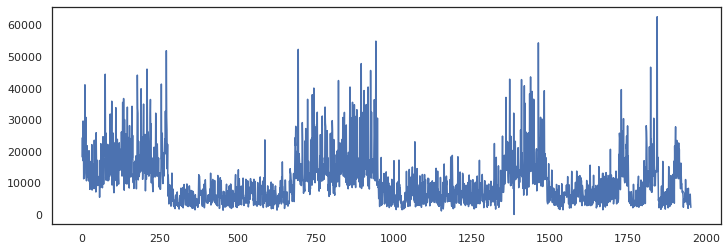

In [134]:
#動員数の折れ線グラフ
train["y"].plot(figsize=(12,4))

<AxesSubplot:>

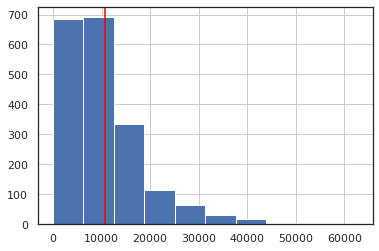

In [135]:
#動員数の平均値を表す
plt.axvline(x=train["y"].mean(),color="red")
train["y"].hist()

<AxesSubplot:>

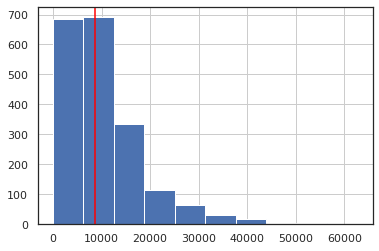

In [136]:
#動員数の中央値を表す
plt.axvline(x=train["y"].median(),color="red")
train["y"].hist()

<AxesSubplot:>

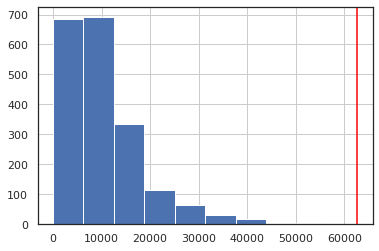

In [137]:
#最大値
plt.axvline(x=train["y"].max(),color="red")
train["y"].hist()
#plt.savefig("sample_fig.png")

<AxesSubplot:title={'center':'y'}, xlabel='[home]'>

/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31119 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kouki/opt/anaconda3/lib/python3.9/site-packages/matplotlib

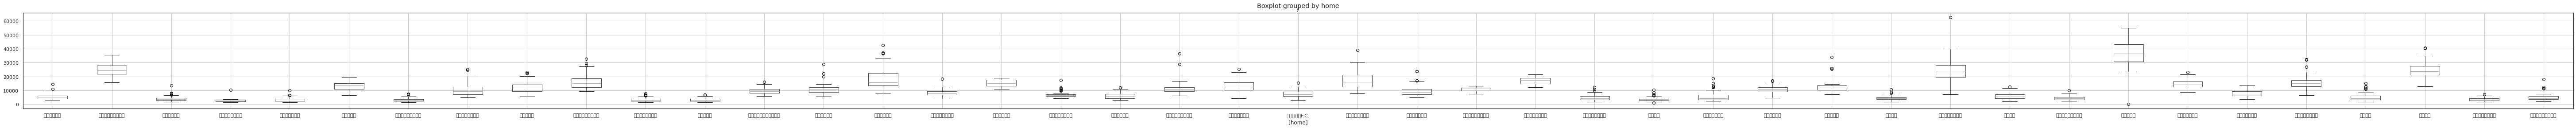

In [138]:
train[["y","home"]].boxplot(by="home",figsize=(100,4))

In [139]:
train.isnull().sum()

id         0
y          0
year       0
stage      0
match      0
gameday    0
time       0
home       0
away       0
stadium    0
tv         0
dtype: int64

In [140]:
train["stadium"].value_counts()

味の素スタジアム                     79
ニッパツ三ツ沢球技場                   60
ニンジニアスタジアム                   55
ケーズデンキスタジアム水戸                54
フクダ電子アリーナ                    54
富山県総合運動公園陸上競技場               54
ＮＤソフトスタジアム山形                 54
北九州市立本城陸上競技場                 54
松本平広域公園総合球技場                 54
レベルファイブスタジアム                 54
シティライトスタジアム                  53
栃木県グリーンスタジアム                 53
正田醤油スタジアム群馬                  51
大分銀行ドーム                      50
Ｓｈｏｎａｎ　ＢＭＷスタジアム平塚            50
鳴門・大塚スポーツパーク　ポカリスエットスタジアム    50
岐阜メモリアルセンター長良川競技場            50
京都市西京極総合運動公園陸上競技場兼球技場        50
うまかな・よかなスタジアム                48
万博記念競技場                      46
ノエビアスタジアム神戸                  44
山梨中銀スタジアム                    44
ヤマハスタジアム（磐田）                 44
埼玉スタジアム２００２                  43
エディオンスタジアム広島                 43
県立カシマサッカースタジアム               42
デンカビッグスワンスタジアム               42
とりぎんバードスタジアム                 42
等々力陸上競技場                     42
ユアテックスタジアム仙台                 41
ＮＡＣＫ５スタジアム大宮                 40
ＩＡＩスタジアム

In [141]:
#相関関係
train[["y","year"]].corr()

,y,year
y,1.000000,0.002161
year,0.002161,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='y'>

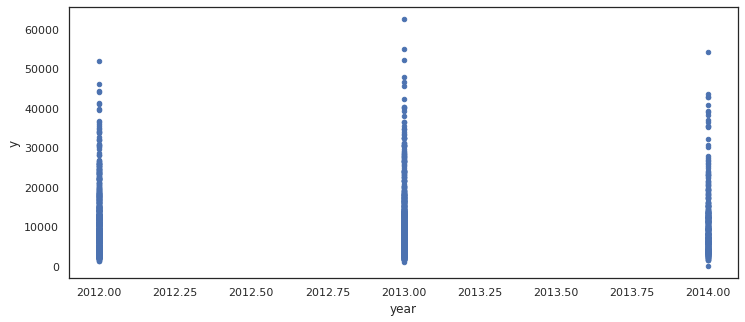

In [142]:
#散布図
train.plot.scatter(x="year",y="y",figsize=(12,5))

In [143]:
from sklearn.linear_model import  LinearRegression as LR

カテゴリ変数はstageとhome,awayに絞る

In [144]:
#stageのダミー変数化
trainX = pd.get_dummies(train[["stage","home","away"]])

In [145]:
trainX

,stage_Ｊ１,stage_Ｊ２,home_アビスパ福岡,home_アルビレックス新潟,home_カターレ富山,home_カマタマーレ讃岐,home_ガイナーレ鳥取,home_ガンバ大阪,home_ギラヴァンツ北九州,home_コンサドーレ札幌,...,away_横浜ＦＣ,away_水戸ホーリーホック,away_浦和レッズ,away_清水エスパルス,away_湘南ベルマーレ,away_鹿島アントラーズ,away_ＦＣ岐阜,away_ＦＣ東京,away_ＦＣ町田ゼルビア,away_Ｖ・ファーレン長崎
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1951,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
model = LR()
model.fit(trainX,train.y)

LinearRegression()

In [147]:
testX = pd.get_dummies(test[["stage","home","away"]])
pred = model.predict(testX)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 88 is different from 82)

In [156]:
#trainとdataの列数が違う原因の探索
trainX.to_csv("trainX_kensyo.csv")
testX.to_csv("testX_kensyo.csv")
list_train = []
list_test = []
with open("trainX_kensyo.csv",encoding="utf-8")as f:
    for i in f:
        list_train = i.split(',')

with open("testX_kensyo.csv",encoding="utf-8")as f:
    for i in f:
        list_test = i.split(',')

#trainXとtestXの項目の差異が何かを確認して、差異をerror.csvに吐き出す
for i in list_train:
    if i in list_test:
        print("合致")
    else:
        #with open("error.csv","a",encoding="utf-8")as f:
            #f.write(i)
        print(i)
        print(list_train)
        print(list_test)

1952
['1952', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
['312', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0\n']
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合致
合

ガイナーレ鳥取、ザスパ草津、ＦＣ町田ゼルビアがhome,awayにtrainには入っているが，testにはないのでtrainからこれらの試合は削除する

In [157]:
train_home1 = train[train['home'] != "ガイナーレ鳥取"]
train_home2 = train_home1[train_home1['home'] != "ザスパ草津"]
train_home3 = train_home2[train_home2['home'] != "ＦＣ町田ゼルビア"]
print(train_home1.shape)
print(train_home2.shape)
print(train_home3.shape)

(1911, 11)
(1890, 11)
(1869, 11)


In [158]:
train_away1 = train_home3[train_home3['away'] != "ガイナーレ鳥取"]
train_away2 = train_away1[train_away1['away'] != "ザスパ草津"]
train_kai = train_away2[train_away2['away'] != "ＦＣ町田ゼルビア"]
print(train_away1.shape)
print(train_away2.shape)
print(train_kai.shape)

(1829, 11)
(1810, 11)
(1791, 11)


In [159]:
#stageのダミー変数化
train_kaiX = pd.get_dummies(train_kai[["stage","home","away"]])

In [160]:
model = LR()
model.fit(train_kaiX,train_kai.y)

LinearRegression()

In [161]:
pred = model.predict(testX)
pred

array([13536., 17568., 33760., 13376., 27680., 14848.,  4512., 12384.,
       14208., 24576., 24448., 11648., 19456., 12544., 13888., 14112.,
       37824.,  9920., 23072., 14656.,  7104., 11488., 19744.,  8224.,
       31744., 16448., 21728., 17120., 16768., 12800., 25216., 19616.,
       15680., 34624., 10528., 12864., 10560., 15872., 17536., 16320.,
        7968., 13248., 21440., 13792., 24800., 10464., 22080., 19008.,
       20480., 16704., 36416., 16416., 14688., 17120., 12544., 15360.,
        4800., 10848., 18016., 10272., 20928., 25824., 10112., 32512.,
       18112., 19360.,  9088., 24096., 11968.,  9280., 15776., 22368.,
       26624., 14144., 14784., 19840., 33280., 13984., 11008., 25600.,
       17248., 14336., 22976., 16192., 10048., 22976., 22784., 17152.,
        3904., 14816., 34368., 16256., 12992., 15616., 16672., 11072.,
       25472., 14624., 15840., 15328., 13760., 12192.,  6944., 10592.,
       27264., 13568.,  9440., 27552., 16256., 13120.,  9344., 15488.,
      

In [162]:
pred.shape

(313,)

In [163]:
sample = pd.read_csv("sample_submit.csv",header=None)

In [164]:
sample[1] = pred
sample.to_csv("submit_new.csv",index=None,header=None)